[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


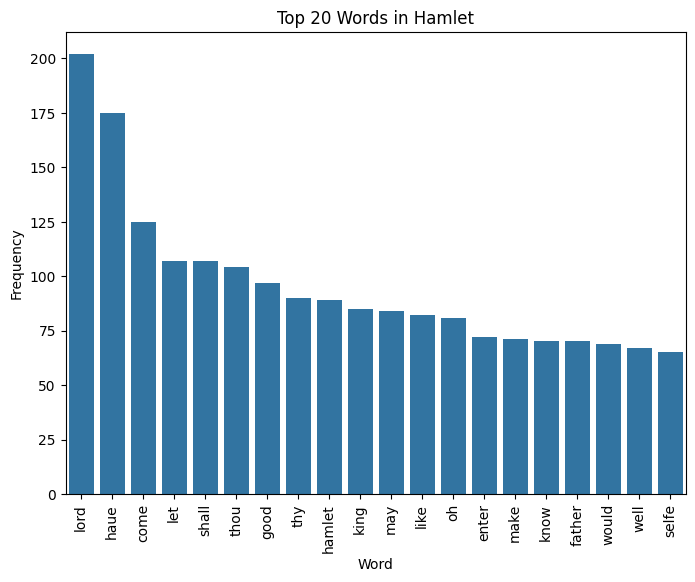

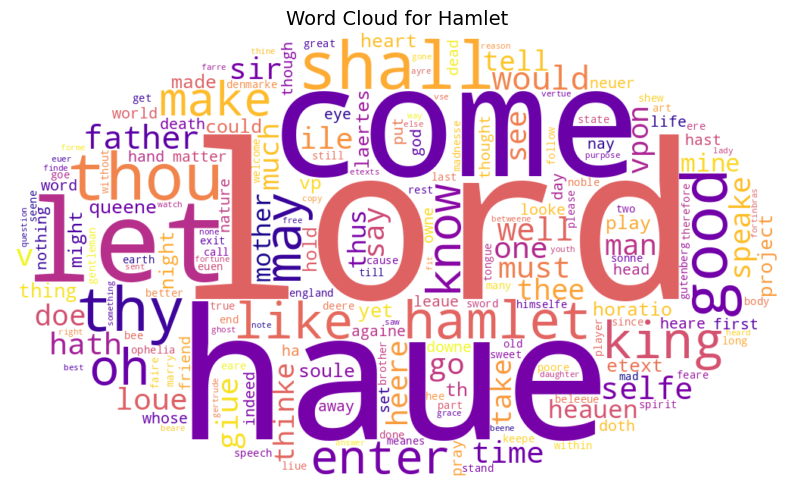

In [9]:
import nltk
import os
nltk.data.path.append('/content/nltk_data')
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import TreebankWordTokenizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

#Download Hamlet Text
target_url = "http://www.gutenberg.org/files/2265/2265.txt"
response = requests.get(target_url)
data = response.text

#Preprocess Text and Tokenization

tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(data)


# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

#Lemmatization
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(word.lower()) for word in filtered_tokens]  # Convert to lowercase

#Word Frequency Count
word_counts = Counter(tokens_lemmatized)
top_20_words = word_counts.most_common(20)

#Plot Top 20 Word Frequency Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=[word[0] for word in top_20_words], y=[word[1] for word in top_20_words])
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Hamlet")
plt.xticks(rotation=90)
plt.savefig("hamlet_word_frequency.png")  # Save before displaying
plt.show()

#Generate Word Cloud with Mask
mask_url = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.v3.imread(mask_url)

wordcloud = WordCloud(
    width=800, height=600, background_color="white",
    mask=mask_image, colormap="plasma", random_state=42
).generate_from_frequencies(word_counts)

#Display the Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Hamlet", fontsize=14)
plt.savefig("hamlet_wordcloud.png")  # Save before displaying
plt.show()
